In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('/Users/nasibamammadli/Downloads/cities_air_quality_water_pollution.18-10-2021.csv')

# Let's first look at what data we have
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               3963 non-null   object 
 1    "Region"          3963 non-null   object 
 2    "Country"         3963 non-null   object 
 3    "AirQuality"      3963 non-null   float64
 4    "WaterPollution"  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB
None

First few rows:
               City                 "Region"                    "Country"  \
0     New York City               "New York"   "United States of America"   
1  Washington, D.C.   "District of Columbia"   "United States of America"   
2     San Francisco             "California"   "United States of America"   
3            Berlin                       ""                    "Germany"   
4       Los Angeles             "California"   "United States of America"   

    "

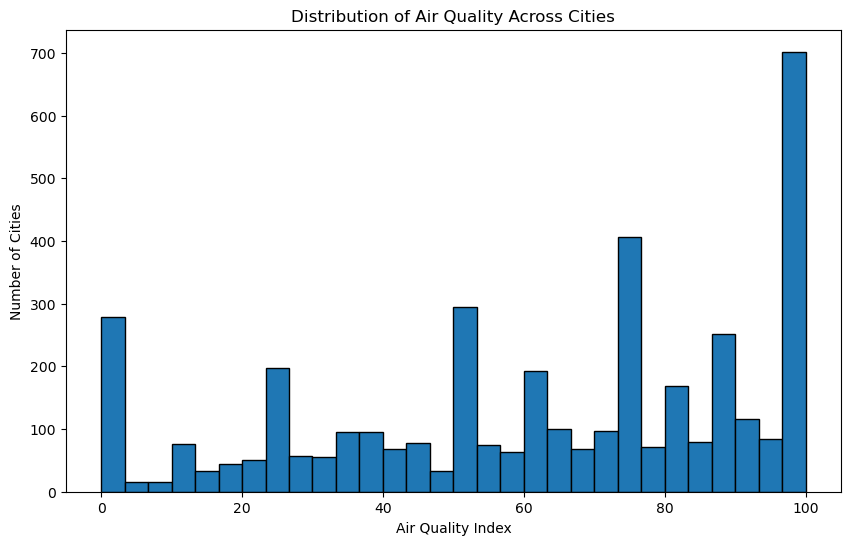

In [5]:
#distribution plot
plt.figure(figsize=(10, 6))
plt.hist(df[' "AirQuality"'], bins=30, edgecolor='black')
plt.title('Distribution of Air Quality Across Cities')
plt.xlabel('Air Quality Index')
plt.ylabel('Number of Cities')
plt.show()

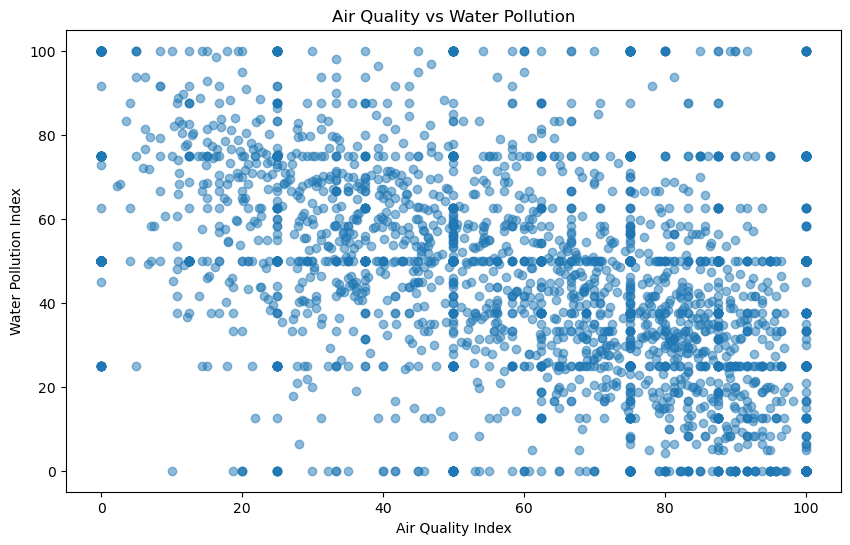

In [5]:
# 2. Scatter plot: Air Quality vs Water Pollution
plt.figure(figsize=(10, 6))
plt.scatter(df[' "AirQuality"'], df[' "WaterPollution"'], alpha=0.5)
plt.title('Air Quality vs Water Pollution')
plt.xlabel('Air Quality Index')
plt.ylabel('Water Pollution Index')
plt.show()

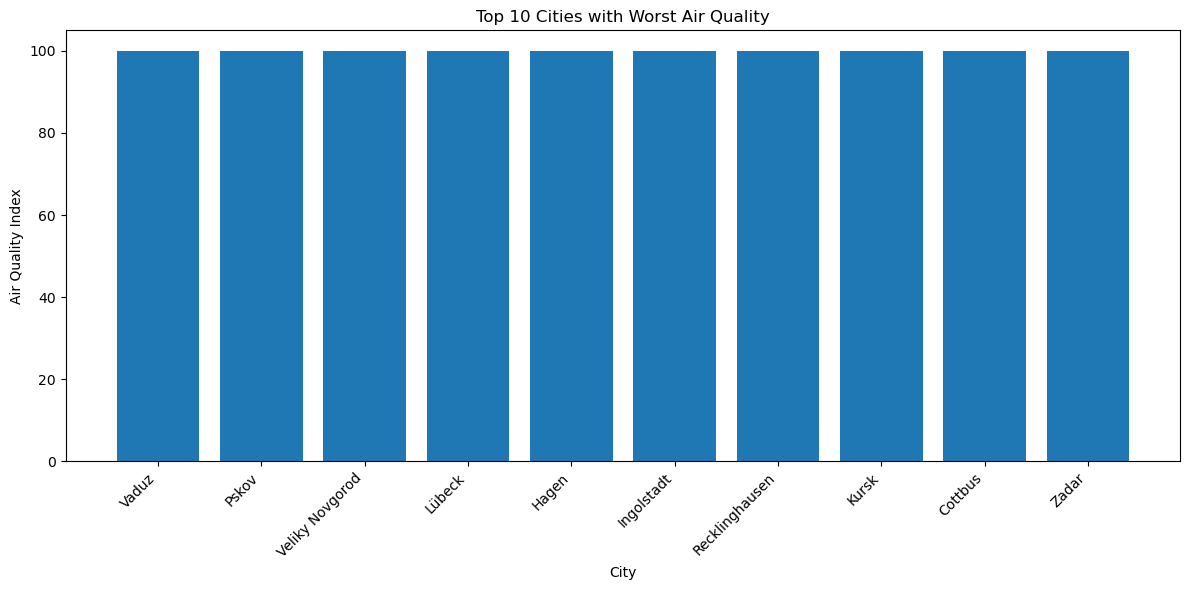

In [7]:
# 3. Bar plot of top 10 cities with worst air quality
worst_air = df.nlargest(10, ' "AirQuality"')
plt.figure(figsize=(12, 6))
plt.bar(worst_air['City'], worst_air[' "AirQuality"'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities with Worst Air Quality')
plt.xlabel('City')
plt.ylabel('Air Quality Index')
plt.tight_layout()
plt.show()

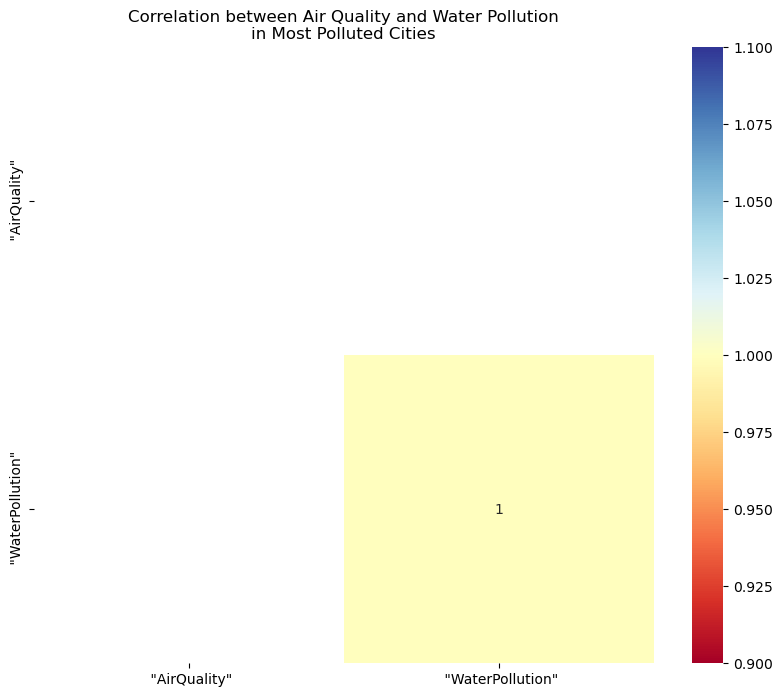

In [11]:
# Create a heatmap of cities with both high air and water pollution
# First get top 20 cities for both metrics
high_pollution = df.nlargest(20, [' "AirQuality"', ' "WaterPollution"'])

plt.figure(figsize=(10, 8))
sns.heatmap(high_pollution[[' "AirQuality"', ' "WaterPollution"']].corr(), 
            annot=True, cmap='RdYlBu')
plt.title('Correlation between Air Quality and Water Pollution\nin Most Polluted Cities')
plt.show()

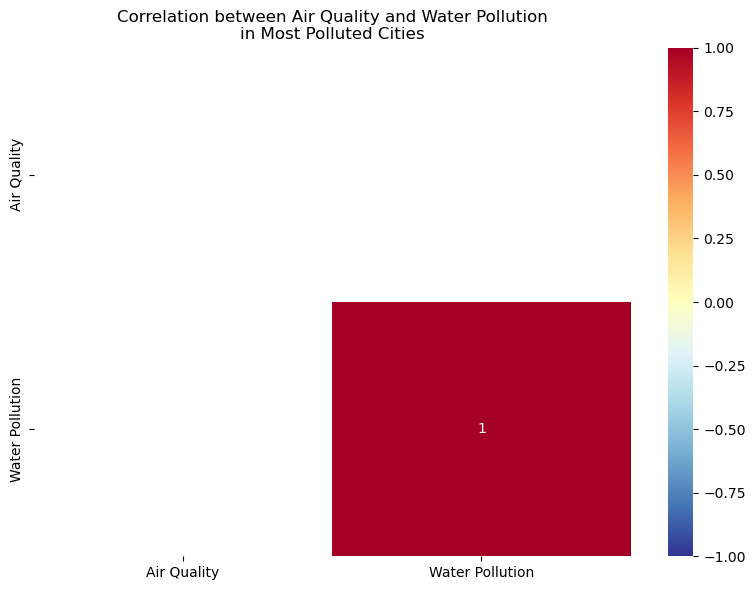


Top 20 Most Polluted Cities:
                    City   "AirQuality"   "WaterPollution"
995              Palikir          100.0              100.0
1721               Chiba          100.0              100.0
2889          Atascadero          100.0              100.0
3211             Kildare          100.0              100.0
3270          Morristown          100.0              100.0
3290          Lake Worth          100.0              100.0
3377               Tawau          100.0              100.0
3621            Linhares          100.0              100.0
3655               Nizwa          100.0              100.0
3742            Taourirt          100.0              100.0
665   Slovenska Bistrica          100.0               75.0
1032              Viedma          100.0               75.0
1052              Kavaje          100.0               75.0
1102             Norfolk          100.0               75.0
1330             Kingman          100.0               75.0
1401                 Ibb  

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. First, let's get the data for the most polluted cities
high_pollution = df.nlargest(20, [' "AirQuality"', ' "WaterPollution"'])

# 2. Create a simpler correlation matrix
correlation_matrix = pd.DataFrame({
    'Air Quality': high_pollution[' "AirQuality"'],
    'Water Pollution': high_pollution[' "WaterPollution"']
}).corr()

# 3. Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show numbers
            cmap='RdYlBu_r',  # Color scheme
            vmin=-1, vmax=1)  # Value range
plt.title('Correlation between Air Quality and Water Pollution\nin Most Polluted Cities')
plt.tight_layout()
plt.show()

# Let's also print the actual data to see what we're working with
print("\nTop 20 Most Polluted Cities:")
print(high_pollution[['City', ' "AirQuality"', ' "WaterPollution"']])